# Quantitative methods - part 2

Today we are going to perform more advanced analysis, including dimensionality reduction and clustering.

## Terms

Firstly, let's introduce some more terminology.

### Univariate vs. multivariate distribution

Last classes, we analyzed distributions of each variable, separately. This kind of distribution is called univariate. It can be represented as a single vector (column of numbers).
To get the more general view of the data as a whole, we need to use multivariate distribution. In this case we consider each sample as a point in multidimensional space. in other words, we are taking into account all the variables simultaneously. The distribution is now represented as matrix (table of numbers).

### Dimensionality

Dimensionality is the number of dimensions (variables) needed to describe point (sample) in given problem. For instance, for the population of people described by: height, weight, age and shoe number, dimensionality of the data set is equal to 4. 
Large sets of data can even have several dozen dimensions. Although usually some of the variables describes similar features of the sample (correlates with each other, for example: height and shoe number). In this situation we can perform dimensionality reduction, to reduce dimensions to those which really matters.

## Correlations and independence

Correlation or dependence is any statistical relationship, **whether causal or not**, between two random variables or bivariate data.
Correlations are useful because they can indicate a predictive relationship that can be exploited in practice. For example, an electrical utility may produce less power on a mild day based on the correlation between electricity demand and weather. In this example, there is a causal relationship, because extreme weather causes people to use more electricity for heating or cooling. However, in general, the presence of a correlation is not sufficient to infer the presence of a causal relationship (i.e., **correlation does not imply causation**). For example: the faster that windmills are observed to rotate, the more wind is observed, but it does not mean that wind is caused by the rotation of windmills.

The opposite of correlation is independence. Two events are independent when, informally speaking, the occurrence of one does not affect the probability of occurrence of the other.

### Linear correlations

Linear correlation is a type of correlations where relation between the variables is linear, i.e., can be described by linear function ($y=ax+b$). In graphic representation, all the points described by correlated variables, forms approximately a straight line.

### Pearson correlation coefficient

To describe quantitatively linear correlation between two variables, the Pearson correlation coefficient can be utilized.  It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. Meaning of values of the coefficient is the following:

* close to -1 - anticorrelation
* close to 0 - independence
* close to 1 - correlation

#### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
science = pd.read_json('data_scraped/beyond_science_metadata.json')
pearson_coeff = np.corrcoef([science.like_count, science.view_count, science.duration])
pearson_coeff

array([[1.        , 0.91950167, 0.1690605 ],
       [0.91950167, 1.        , 0.09093584],
       [0.1690605 , 0.09093584, 1.        ]])

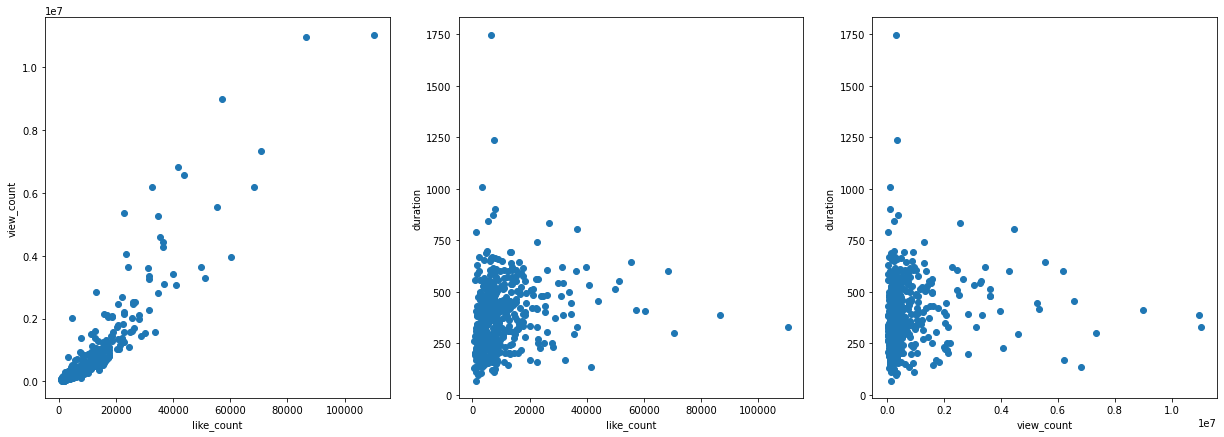

In [3]:
pairs = [('like_count', 'view_count'), ('like_count', 'duration'), ('view_count', 'duration')]
fig = plt.figure()
fig.set_size_inches(21,7)
for i, pair in enumerate(pairs):
    ax = fig.add_subplot(1, 3, i + 1)
    ax.scatter(science[pair[0]], science[pair[1]])
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

### Coefficient of determination

Coefficient of determination ($R^2$) according to the simplest definition is square of the Pearson correlation coefficient. It has a value between 0 and 1 and describes a goodness of fit a line to data (1 - perfect fit, 0 - no fit at all).

#### Example

In [4]:
pearson_coeff ** 2

array([[1.        , 0.84548332, 0.02858145],
       [0.84548332, 1.        , 0.00826933],
       [0.02858145, 0.00826933, 1.        ]])

### Non-linear correlations and other measures

In many cases other type of correlations occurs and simple linear correlation coefficient is not enough to describe the problem. In this case more general measures are required, such as mutual information (we will learn about it later).

## Dimensionality Reduction

Dimensionality reduction is an operation of decreasing number of variables describing dataset. The most naive approach is to simply remove redundant variables, correlating with others, although it always comes with imformation loss. To lose as little information as possible, the more sophisticated methods implying transformation of coordinates should be used. One of them is PCA.

### Principal Component Analysis

The principal components of a collection of points in a real coordinate space are a sequence of $p$ unit vectors, where the $i$-th vector is the direction of a line that best fits the data while being orthogonal to the first $i−1$ vectors. 
Here, a best-fitting line is defined as one that minimizes the average squared distance from the points to the line.
Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

In data analysis, the first principal component of a set of $p$ variables, presumed to be jointly normally distributed, is the derived variable formed as a linear combination of the original variables that explains the most variance. The second principal component explains the most variance in what is left once the effect of the first component is removed, and we may proceed through $p$ iterations until all the variance is explained. PCA is most commonly used when many of the variables are highly correlated with each other and it is desirable to reduce their number to an independent set. 

PCA is usually performed as a first step before other more computational-expensive analyses (e.g. clustering) to reduce complexity of problem.

This operation also allows us to represent dataset in graphical form for example as points on a plane (if we reduce dimensionality to 2).

#### Example

Let's consider joined data collected from three totally different channels:
* "Beluga" - popular channel with short funny videos
* "Daniel Rakowiecki" - polish channel with long videos about repairing electronics
* "Kings and Generals" - historical channel, mentioned before

In [5]:
# loading and concatenating data
beluga = pd.read_json('Beluga1_metadata.json')
daniel = pd.read_json('DanielRakowiecki_metadata.json')
kings = pd.read_json('data_scraped/kings_and_generals_metadata.json')
all_data = pd.concat([beluga, daniel, kings], ignore_index=True)

As a variables describing each sample, let's choose:

* like count
* views count
* duration
* number of keywords
* length of title

Then the dimensionality is 5.

In [6]:
# constructing matrix with all of the five variables
df = pd.DataFrame()
df['likes'] = all_data.like_count
df['views'] = all_data.view_count
df['duration'] = all_data.duration
df['number_of_keywords'] = all_data.keywords.map(len)
df['length_of_title'] = all_data.title.map(len)

In [7]:
df

,likes,views,duration,number_of_keywords,length_of_title
0,75730,740947,180,19,24
1,89291,1735319,178,16,33
2,112390,2429437,137,18,22
3,142183,2928223,181,17,26
4,118442,2605067,187,16,25
...,...,...,...,...,...
960,24043,982901,781,47,48
961,62537,3274844,759,45,57
962,15369,695608,719,39,56
963,12650,569447,772,38,47


We clearly see that it is impossible to represent those data graphically in this form. We can try to create scatter plots for each pair of variables, although they are hard to interpret as a whole.

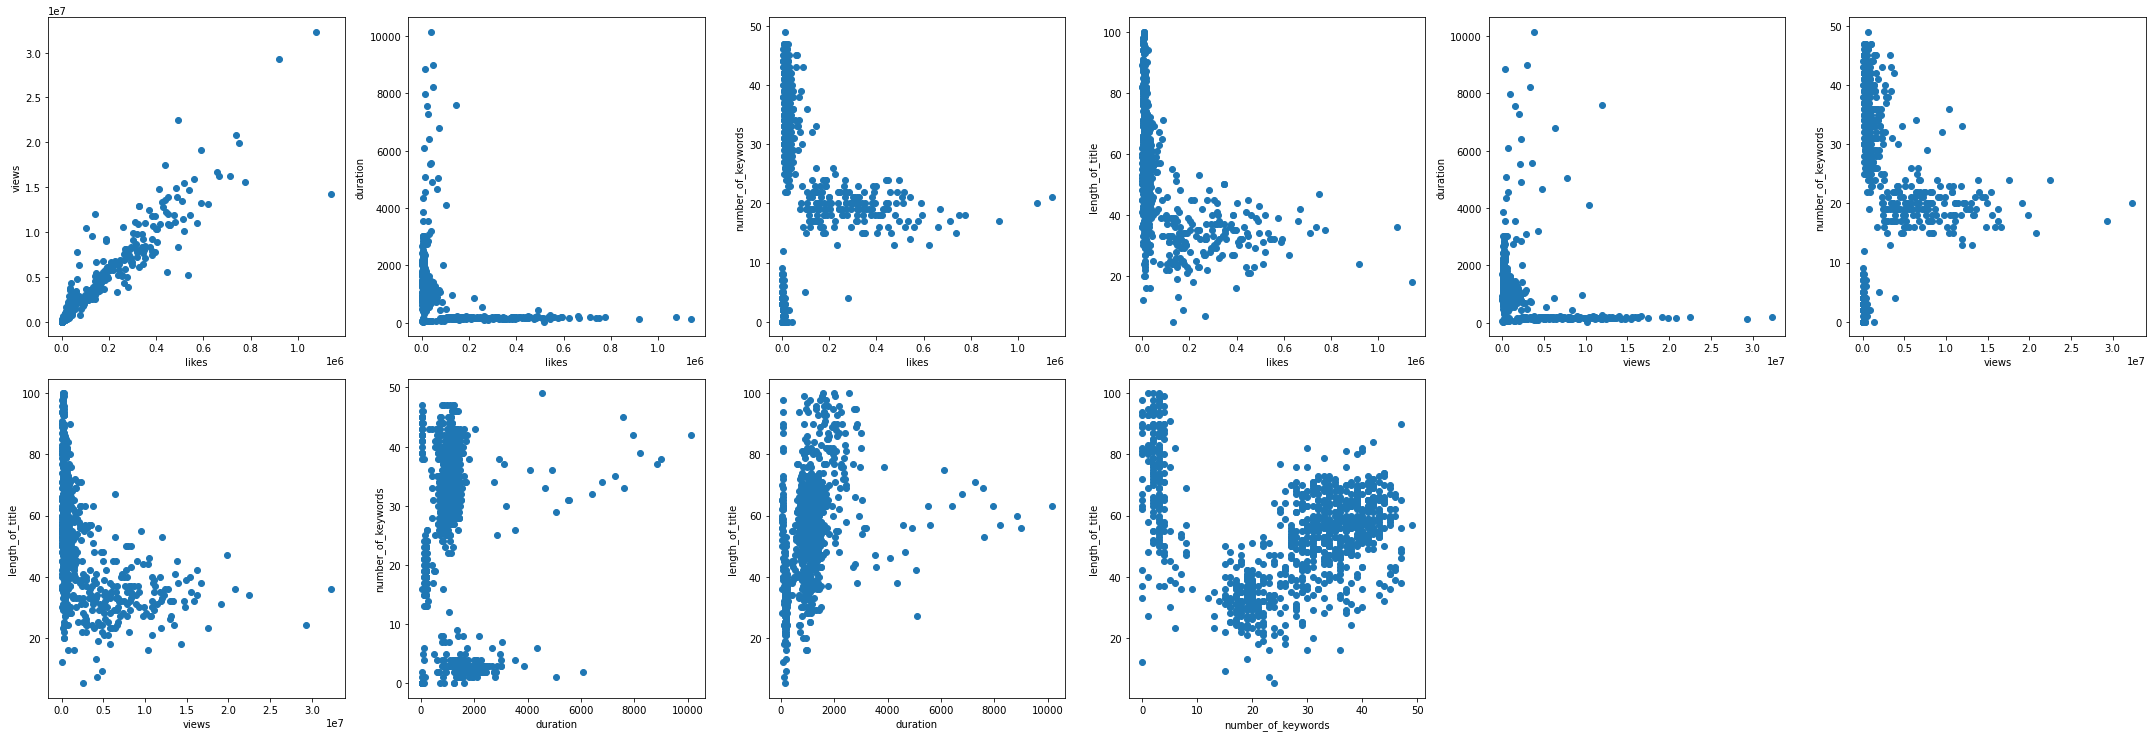

In [8]:
import itertools
fig = plt.figure()
fig.set_size_inches(30,30)
for i, (category1, category2) in enumerate(itertools.combinations(df.columns, 2)):
    ax = fig.add_subplot(6,6,i+1)
    ax.set_xlabel(category1)
    ax.set_ylabel(category2)
    ax.scatter(df[category1], df[category2])
plt.tight_layout()

Let's reduce dimensionality to 2 to make is possible to represent as much of variance as possible on one scatter plot. The first step is autoscaling data, i.e. transforming them to form where mean of each column is equal to 0 and standars deviation is equal to 1. It is necessary, because in PCA distances between points are important and we want to treat all the features equally (without autoscalling distance between extreme numbers of keywords is about 100 and distance between extreme numbers of views is about 10 000 000, although conceptually it should be similar).
To autoscale data in column, simply subtract a mean of column from each value and then divide each value by standard deviation of column. Alternatively you can utilize `StandardScaler` from `sklearn`.

In [9]:
from sklearn.preprocessing import StandardScaler
standarized_df = StandardScaler().fit_transform(df)

To perform PCA, we utilize `PCA` from `sklearn` with number of components equal to 2:

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(standarized_df)

Let's investigate how much variance is described by first two principal axes:

In [11]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.49950373 0.23041176]
0.7299154942515431


and relation between two new components and the old variables:

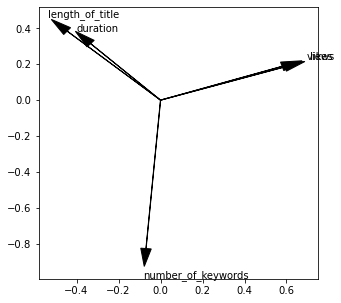

In [12]:
fig = plt.figure()
fig.set_size_inches(5, 5)
for i, coeff in enumerate(pca.components_.T):
    plt.arrow(0, 0, coeff[0], coeff[1], color="black", head_width=0.05, head_length=0.1)
    plt.text(coeff[0]*1.2, coeff[1]*1.2, df.columns[i])

We can see that first component (horizontal) correlates with numbers of views and likes and second component anticorrelates with number of keywords. Length of title and duration anticorrelates/correlates weakly with both components.

Finally we can present data on one scatter plot, where axes are first and second principal components:

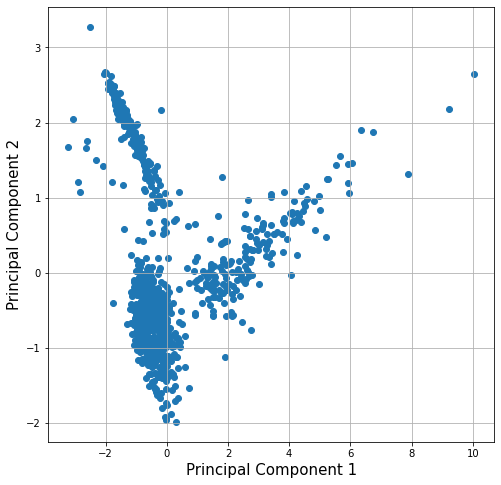

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(principal_components[:,0], principal_components[:,1])
ax.grid()

In the picture we can see that data groups in three oblong blobs. Now we will try to allgorithmically divide data into categories using one of the clustering algorithms.

## Clustering

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). Cluster analysis itself is not one specific algorithm, but the general task to be solved. It can be achieved by various algorithms that differ significantly in their understanding of what constitutes a cluster and how to efficiently find them. Popular notions of clusters include groups with small distances between cluster members, dense areas of the data space, intervals or particular statistical distributions. 

### K-Means algorithm

1. Draw $K$ random points as innitial cluster centers.
1. Assign each point to the closest cluster center.
1. For each cluster update coordinates of center, by computing mean location
1. Repear point 2. and 3. until the algorithm has converged, i.e. the assignments no longer change.

### Determining number of clusters

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. 

Using the "elbow" or "knee of a curve" as a cutoff point is a common heuristic in mathematical optimization to choose a point where diminishing returns are no longer worth the additional cost. In clustering, this means one should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. 

C:\Users\atrzo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


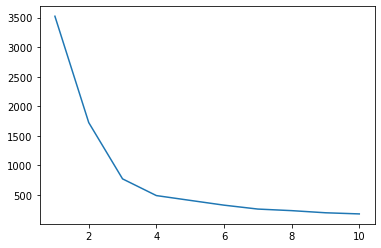

In [14]:
from sklearn.cluster import KMeans

kmeans_kwargs = {
    "init": "random",
    "n_init": 20,
    "max_iter": 500,
    "random_state": 11,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    clustering = KMeans(n_clusters=k, **kmeans_kwargs)
    clustering.fit(principal_components)
    sse.append(clustering.inertia_)
plt.plot(np.arange(1, 11), sse)

In this case optimal number of clusters is 3.

### Actual clustering and graphic representation

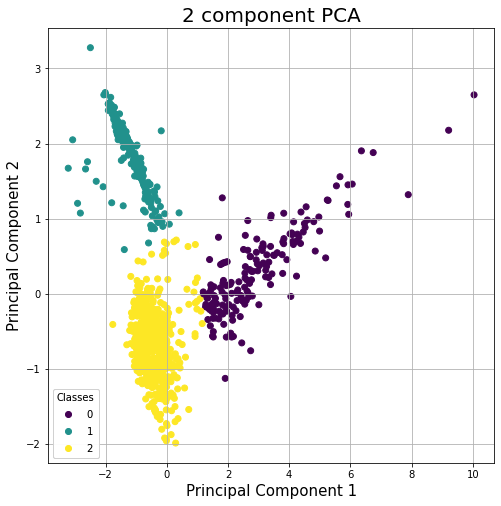

In [15]:
clustering = KMeans(n_clusters=3, **kmeans_kwargs)
clustering.fit(principal_components)
predictions = clustering.predict(principal_components)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
scatter = ax.scatter(principal_components[:,0], principal_components[:,1], c=predictions)
ax.grid()
legend1 = ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

### Comparation with authorship of video

In [16]:
channel = all_data.author.astype('category').cat.codes

In [17]:
pd.crosstab(channel, predictions)

col_0,0,1,2
row_0,,,
0,169,0,12
1,0,163,7
2,1,28,585


Here we can see that:
* each cluster consists of mostly one author videos.
* "Beluga" videos are generally more viewed and liked than others and has the shortest videos.
* "Daniel Rakowiecki" videos are the longest. Also they are liked similarly to "Kings and Generals".
* "Kings and Generals" videos has the most keywords assigned.

## Exercises

Try to repeat all steps for other channels chosen by you.